# Reproduce scVI results

In [1]:
cd ../..

/home/ubuntu/scVI


In [2]:
import os

import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from scvi.dataset import CortexDataset, RetinaDataset, BrainLargeDataset, HematoDataset, CbmcDataset, SyntheticDataset, PbmcDataset, BrainSmallDataset

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.metrics.differential_expression import de_stats
from scvi.metrics.imputation import imputation
from scvi.metrics.adapt_encoder import adapt_encoder


from scvi.models import VAE, SVAEC

from scvi.inference import VariationalInference

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Import Datasets**

In [3]:
#pbmc_dataset = PbmcDataset()
#brainsmall_dataset = BrainSmallDataset()

### Figure 1c. runtime

In [ ]:
# Load Dataset 
brainlarge_dataset = BrainLargeDataset()

# Set hyperparameters 
n_epochs= 200
lr=0.001
use_batches=False
use_cuda=True

In [10]:
n_latent = 10
n_cells_list = [100000, 50000, 30000, 15000, 10000, 4000]
for n_cells in n_cells_list: 
    print(n_cells, " cells") 
    brainlarge_dataset.subsample_cells(n_cells)
    
    brainlarge_vae = VAE(brainlarge_dataset.nb_genes, n_batch=brainlarge_dataset.n_batches * use_batches) 
    brainlarge_infer = VariationalInference(brainlarge_vae,
                                 brainlarge_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
    % time brainlarge_infer.train(n_epochs=n_epochs, lr=lr)

100000  cells
Downsampling from 1306127 to 100000 cells
training: 100%|██████████| 200/200 [25:32<00:00,  7.66s/it]
CPU times: user 25min 35s, sys: 4.12 s, total: 25min 39s
Wall time: 25min 35s
50000  cells
Downsampling from 100000 to 50000 cells
training: 100%|██████████| 200/200 [12:45<00:00,  3.83s/it]
CPU times: user 12min 47s, sys: 1.88 s, total: 12min 49s
Wall time: 12min 47s
30000  cells
Downsampling from 50000 to 30000 cells
training: 100%|██████████| 200/200 [07:38<00:00,  2.29s/it]
CPU times: user 7min 39s, sys: 1.21 s, total: 7min 41s
Wall time: 7min 39s
15000  cells
Downsampling from 30000 to 15000 cells
training: 100%|██████████| 200/200 [03:49<00:00,  1.15s/it]
CPU times: user 3min 50s, sys: 584 ms, total: 3min 50s
Wall time: 3min 50s
10000  cells
Downsampling from 15000 to 10000 cells
training: 100%|██████████| 200/200 [02:34<00:00,  1.30it/s]
CPU times: user 2min 34s, sys: 452 ms, total: 2min 35s
Wall time: 2min 34s
4000  cells
Downsampling from 10000 to 4000 cells
trai

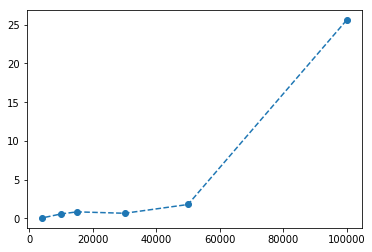

In [21]:
time = "25min 35s, 12min 47s, 07min 39s, 03min 50s, 02min 34s, 01min 3s"
time = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(time).split(",")]

plt.plot(n_cells_list, time, label="scVI", marker='o', linestyle='--')

### Table 1. log likelihood

In [6]:
# Load Dataset 
brainlarge_dataset = BrainLargeDataset()

# Set hyperparameters 
n_epochs= 200
lr=0.001
use_batches=False
use_cuda=True

File data/genomics.h5 already downloaded
Preprocessing Brain Large data
720 genes subsampled
1306127 cells subsampled
Finished preprocessing data


In [8]:
n_cells_list = [100000, 50000, 30000, 15000, 10000, 4000]

for n_cells in n_cells_list:
    brainlarge_dataset.subsample_cells(n_cells) 
    
    brainlarge_vae = VAE(brainlarge_dataset.nb_genes, n_batch=brainlarge_dataset.n_batches * use_batches) 
    brainlarge_infer = VariationalInference(brainlarge_vae,
                                 brainlarge_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5) 
    % time brainlarge_infer.train(n_epochs=n_epochs, lr=lr)
    log_likelihood = adapt_encoder(brainlarge_infer, n_path=1) 
    print(str(n_cells) + " cells log likelihood: " + str(log_likelihood)) 

Downsampling from 4000 to 4000 cells
training: 100%|██████████| 200/200 [01:03<00:00,  3.15it/s]
CPU times: user 1min 3s, sys: 320 ms, total: 1min 3s
Wall time: 1min 3s
training: 100%|██████████| 50/50 [00:01<00:00, 25.01it/s]
100000 cells log likelihood: 1943.7015576171875
Downsampling from 4000 to 4000 cells
training: 100%|██████████| 200/200 [01:04<00:00,  3.12it/s]
CPU times: user 1min 4s, sys: 232 ms, total: 1min 4s
Wall time: 1min 4s
training: 100%|██████████| 50/50 [00:01<00:00, 25.24it/s]
50000 cells log likelihood: 1932.7087744140624
Downsampling from 4000 to 4000 cells
training: 100%|██████████| 200/200 [01:03<00:00,  3.14it/s]
CPU times: user 1min 3s, sys: 244 ms, total: 1min 4s
Wall time: 1min 3s
training: 100%|██████████| 50/50 [00:01<00:00, 25.11it/s]
30000 cells log likelihood: 1944.1216259765624
Downsampling from 4000 to 4000 cells
training: 100%|██████████| 200/200 [01:03<00:00,  3.14it/s]
CPU times: user 1min 3s, sys: 220 ms, total: 1min 4s
Wall time: 1min 3s
training

### Figure 2. imputation (Uniform Corruption) 

In [9]:
# Load Dataset 
cortex_dataset = CortexDataset()

# Set hyperparameters 
n_epochs=500
lr=0.0004
use_batches=False
use_cuda=True

Preprocessing Cortex data
Finished preprocessing Cortex data


In [10]:
# Train the model
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
cortex_infer = VariationalInference(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
cortex_infer.train(n_epochs=n_epochs, lr=lr)


training: 100%|██████████| 500/500 [01:51<00:00,  4.48it/s]


training: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
Imputation Scores [corruption:uniform - rate:0.09] on  train after 1:
Median of Median: 2.3821
Mean of Median for each cell: 4.4600


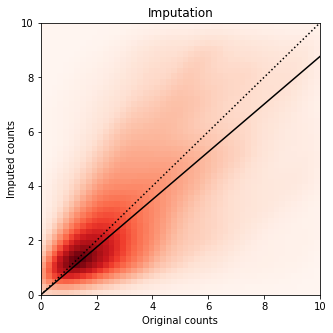

<Figure size 432x288 with 0 Axes>

In [11]:
original_list, imputed_list = cortex_infer.imputation('train', 
                                                   rate=0.09, 
                                                   corruption="uniform", 
                                                   verbose=True)

### Figure 3. interpreting latent space; tsne plot and heatmap

CORTEX tsne plot

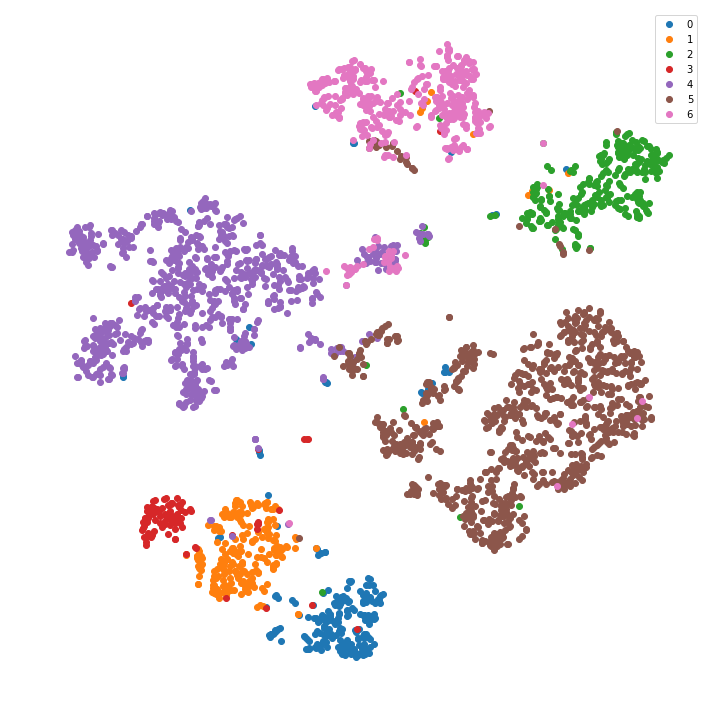

In [12]:
cortex_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

CORTEX distance matrix heat map

In [ ]:
celltypes = np.array(['astrocytes_ependymal', 'endothelial-mural', 'interneurons',
       'microglia', 'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS'],
      dtype='|S64')
beloved_order = np.array(['interneurons', 'pyramidal SS', 'pyramidal CA1', 'endothelial-mural', \
 'microglia', 'astrocytes_ependymal', 'oligodendrocytes'])


mapping = [np.where(beloved_order == x)[0][0] for x in celltypes]

def visualize_distance(latent, labels, mapping):
    sorting_labels = [mapping[int(x)] for x in c_train]
    order_latent = np.vstack([x for _, x in sorted(zip(sorting_labels, latent), key=lambda pair: pair[0])])
    order_label = np.vstack([x for _, x in sorted(zip(sorting_labels, labels), key=lambda pair: pair[0])])
    
    distance = scipy.spatial.distance_matrix(order_latent, order_latent)  
    
    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 70], height_ratios=[1, 70])
    gs.update(wspace=0.05, hspace=0.05)
    ax0 = plt.subplot(gs[1])
    ax0.imshow(order_label.T, cmap='tab10', interpolation='none', aspect=100)
    ax0.axis('off')
    ax1 = plt.subplot(gs[3], sharex=ax0)
    ax1.imshow(distance, cmap='hot', interpolation='none')
    ax1.axis('off')
    ax2 = plt.subplot(gs[2], sharey=ax1)
    ax2.imshow(order_label, cmap='tab10', interpolation='none', aspect=1/100.)
    ax2.axis('off')
    
visualize_distance(latent, c_train, mapping) # c_train is labels for training set 

HEMATO tsne plot

training: 100%|██████████| 500/500 [2:08:20<00:00, 15.40s/it]


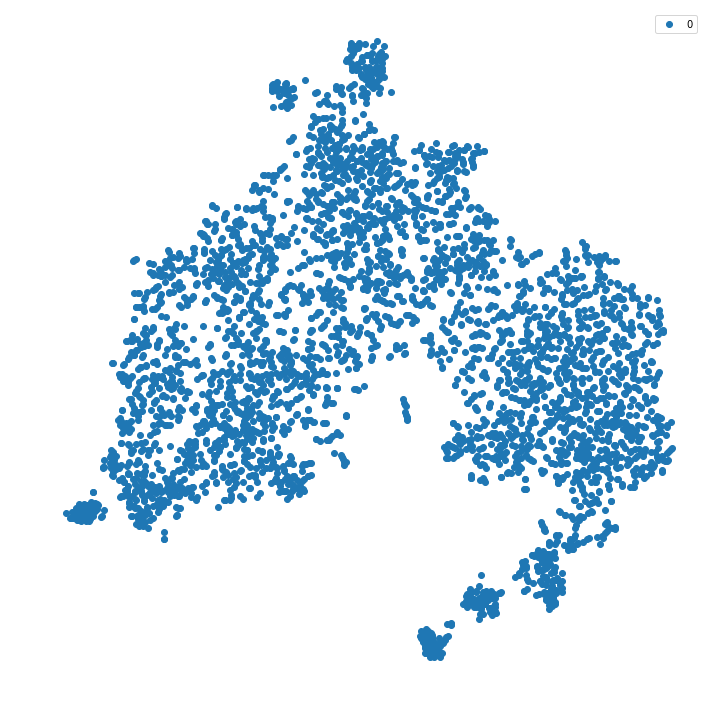

In [32]:
hemato_dataset = HematoDataset() 
hemato_vae = VAE(hemato_dataset.nb_genes, n_batch=hemato_dataset.n_batches * use_batches)
hemato_infer = VariationalInference(hemato_vae,
                                    hemato_dataset,
                                    train_size=0.9, 
                                    use_cuda=use_cuda, 
                                    frequency=5)
hemato_infer.train(n_epochs=n_epochs, lr=lr)
hemato_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

HEMATO distance matrix heat map

In [ ]:
visualize_distance(latent_scVI, logit(meta.iloc[:, 2]), "scVI")

ZINB 

training: 100%|██████████| 500/500 [01:12<00:00,  6.94it/s]


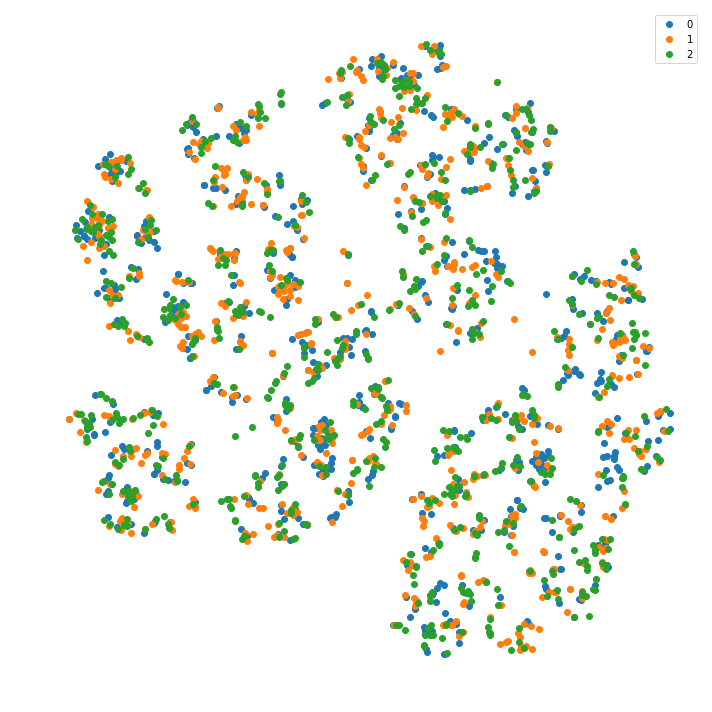

In [13]:
synthetic_dataset = SyntheticDataset(batch_size=1000, nb_genes=10)
synthetic_vae = VAE(synthetic_dataset.nb_genes, n_batch=synthetic_dataset.n_batches * use_batches)
synthetic_infer = VariationalInference(synthetic_vae, 
                                       synthetic_dataset, 
                                       train_size=0.9, 
                                       use_cuda=use_cuda, 
                                       frequency=5)
synthetic_infer.train(n_epochs=n_epochs, lr=lr)
synthetic_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

ZINB Distance Matrix Heat Map

In [ ]:
def visualize_distance(latent, labels, algorithm):
    order_latent = np.vstack([x for _, x in sorted(zip(labels,latent), key=lambda pair: pair[0])])
    order_label = np.vstack([y for y, x in sorted(zip(labels,latent), key=lambda pair: pair[0])])
    distance = scipy.spatial.distance_matrix(order_latent, order_latent)  
    
    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 70], height_ratios=[1, 70])
    gs.update(wspace=0.05, hspace=0.05)
    ax0 = plt.subplot(gs[1])
    ax0.imshow(order_label.T, cmap='Dark2', interpolation='none', aspect=100)
    ax0.axis('off')
    ax1 = plt.subplot(gs[3], sharex=ax0)
    ax1.imshow(distance, cmap='hot', interpolation='none')
    ax1.axis('off')
    ax2 = plt.subplot(gs[2], sharey=ax1)
    ax2.imshow(order_label, cmap='Dark2', interpolation='none', aspect=1/100.)
    ax2.axis('off')
    #plt.tight_layout()
    fig.suptitle("Cell-Cell Similarity matrix on the "+ algorithm + " latent space", fontsize=16, y=0.92) 
    
visualize_distance(latent_scVI, labels, "scVI") 

### Figure 4. batch effect removal; tsne plot

In [16]:
# Load Retina Dataset 
retina_dataset = RetinaDataset()

# Set hyperparameters 
n_epochs=100
lr=0.0005
use_batches=True
use_cuda=True

# Train the model
retina_vae = VAE(retina_dataset.nb_genes, n_batch=retina_dataset.n_batches * use_batches)
retina_infer = VariationalInference(retina_vae,
                                 retina_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
retine_infer.train(n_epochs=n_epochs, lr=lr)

File data/retina.loom already downloaded
Preprocessing dataset
Finished preprocessing dataset
training: 100%|██████████| 100/100 [10:54<00:00,  6.55s/it]


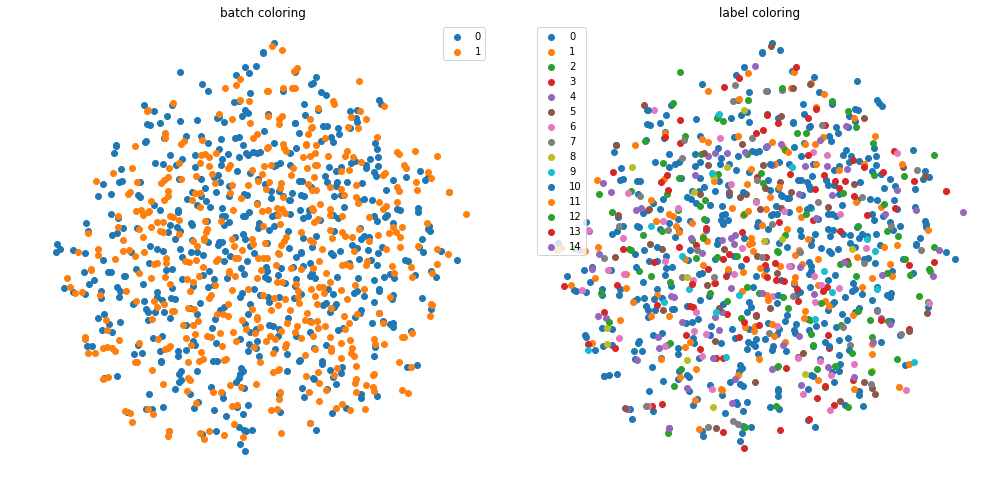

In [17]:
retina_infer.show_t_sne('sequential',n_samples=1000, color_by='batches and labels')

### Figure 5. differential expression; plots

In [ ]:
# PBMC

### Figure 6. plots 

In [ ]:
# PBMC

### Figure 7. posterior plots

In [ ]:
# CORTEX
latent = eval_latent(model, expression_train, sess)
x__, y__ = posterior_data_scVI(latent, hrange=(0, 500), posterior_sample=500, all_genes=False)

mapping = lambda x: np.log(1 + x / 10.)
inv_mapping = lambda x: (np.exp(x) - 1) * 10

plt.figure(figsize=(5, 5))
draw_custom_hist_data(x__, y__)
plt.title("scVI posterior density for gene Thy1")
plt.xlabel("Original values")
plt.ylabel("Posterior transcript counts")
plt.colorbar()


In [ ]:
x__, y__ = posterior_data_scVI(latent, hrange=(0, 10), posterior_sample=50)


data = [x__[y__ == t].flatten() for t in range(0, 10)]
plt.figure(figsize=(5, 5))
plt.boxplot(data, sym="")
plt.xticks(range(1, 11), range(0, 10))


l = np.linspace(0, 10, 50)
plt.plot(l, l, linestyle="--", alpha=0.5)
plt.xlabel("original values")
plt.ylabel("scVI posterior uncertainty")

### Figure 8. silhouette and batch mixing entropy 

In [ ]:
def barplot(mean, alg, title, save=None, interest=0):
    N = 4

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)
    rects1 = ax.barh(ind, mean, width, color='r')
    if interest > 0:
        func = np.min
    else:
        func = np.max
    ax.axvline(x=func(mean), ymin=0, ymax = 5, linewidth=1, color='b')

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)
    
    plt.show()

In [ ]:
def barplot_list(mean, alg, title, save=None, interest=0, prog=False, figsize=None):
    

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    if figsize is None:
        fig = plt.figure(dpi=300)

    else:
        fig = plt.figure(figsize=figsize, dpi=300)
    ax = fig.add_subplot(111)
    
    if len(data[0]) == 3:
        width = 0.25       # the width of the bars
    
    else:
        width = 0.15
        
        
    rects = [] 
    color = ["r", "g", "y", "b", "purple"]
    if prog:
        color = ['darkred', "red", "tomato", "salmon"]
    for i in range(len(data[0])):    
        rects.append(ax.barh(ind + i * width, zip(*data)[i], width, color=color[i]))
        
    anchor_param = (0.8, 0.8)
    leg_rec = [x[0] for x in rects]
    leg_lab = ('ASW', 'ARI', 'NMI', "BE", "BASW")
    if prog:
        leg_lab = ["2", "3", "4", "7"]
    ax.legend(leg_rec, leg_lab[:len(data[0])] )

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind + width)
    ax.set_yticklabels(alg)
    plt.tight_layout()

In [ ]:
def barplot_CITE_list(mean, alg, title, save=None, interest=0, figsize=None):
    

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    
    if figsize is None:
        fig, ax1 = plt.subplots()
    else:
        fig, ax1 = plt.subplots(figsize=figsize)
    rect1 = ax1.barh(ind, zip(*data)[0], width, color="b")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_xlabel('Spearman Correlation', color='b')
    ax1.tick_params('x', colors='b')    
    
    ax2 = ax1.twiny()
    rect2 = ax2.barh(ind + width, zip(*data)[1], width, color="r")
    ax2.set_xlabel('Fold Enrichment', color='r')
    ax2.tick_params('x', colors='r')

    ax1.set_title(title, y=-0.3)
    ax1.set_yticks(ind + width)
    ax1.set_yticklabels(alg)
    plt.tight_layout()

In [ ]:
# (a) PBMC

In [ ]:
# (b) CORTEX Clustering Metrics 
alg = ["scVI"] 
cortex_data = [] # Add clustering metrics data 
barplot_list(cortex_data, alg, 'Clustering metrics (CORTEX)')

In [ ]:
# (c) CBMC Representation Metrics 
cbmc_dataset = CbmcDataset() 
data = [] # Add representation  metrics data  
barplot_CITE_list(data, alg, 'Representation metrics (CBMC)')

In [ ]:
# (d) RETINA Clustering Metrics 
retina_data = [] # Add clustering metrics data 
barplot_list(retina_data, alg, 'Clustering metrics (RETINA)')

In [ ]:
# (e) (f) (g) CORTEX Hierarchical Clustering Scores 
l = [(0, "ASW"), (1, "ARI"), (2, "NMI")]
scVI = [[0.32763597, 0.76727788550279996, 0.85143768403508435],
[0.2937676, 0.69296827058660748, 0.77395790102006323],
[0.32925251, 0.69496427498138469, 0.6757547322038292],
[0.29131631, 0.7885597929239393, 0.81132417587061612]] 

for i in range(3):
    data = zip(*scVI)[l[i][0]]
    barplot_list(data, alg, 'Hierarchical clustering ' + l[i][1] +' scores (CORTEX)', prog=True, figsize=(5, 5))

### Figure 9. imputation

In [18]:
# CORTEX 
cortex_infer = VariationalInference(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.6,
                                 use_cuda=use_cuda,
                                 frequency=5) 
log_likelihood = adapt_encoder(cortex_infer, n_path=1) 

training: 100%|██████████| 50/50 [00:04<00:00, 16.28it/s]


### Figure 10. imputation

training: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]
Imputation Scores [corruption:binomial - rate:0.10] on  train after 1:
Median of Median: 2.6102
Mean of Median for each cell: 2.9797


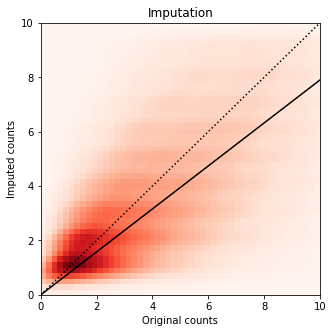

<Figure size 432x288 with 0 Axes>

In [19]:
# CORTEX 
original_list, imputed_list = cortex_infer.imputation('train', 
                                                       rate=0.1, 
                                                       corruption="binomial", 
                                                       verbose=True)

### Figure 11. imputation (Binomial Corruption)

CORTEX 

BRAIN_LARGE 

In [23]:
# Load Dataset 
brainlarge_dataset = BrainLargeDataset()

# Set hyperparameters
n_epochs=500
lr=1e-3
use_batches=False
use_cuda=True

# Train the model and output model likelihood every 5 epochs
brain_large_vae = VAE(brain_large_dataset.nb_genes, n_batch=brain_large_dataset.n_batches * use_batches)
brain_large_infer = VariationalInference(brain_large_vae,
                                 brain_large_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
brain_large_infer.train(n_epochs=n_epochs, lr=lr)

File data/genomics.h5 already downloaded
Preprocessing Brain Large data
720 genes subsampled
1306127 cells subsampled
Finished preprocessing data


NameError: name 'brain_large_dataset' is not defined

In [ ]:
original_list, imputed_list = brain_large_infer.imputation('train', 
                                                           rate=0.1, 
                                                           corruption="binomial", 
                                                           verbose=True)

### Figure 12. DE; plots

In [ ]:
# PBMC 

### Figure 13. DE; plots

In [ ]:
# BRAIN_SMALL

### Figure 14. imputation 

In [ ]:
# BRAIN_LARGE, CORTEX

### Figure 15. clustering

In [ ]:
# random and HEMATO

### Figure 16. tsne

In [ ]:
# HEMATO